In [221]:
# coding: utf-8
# Module Name : titanic.py


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')


# 데이터 불러오기
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

# 데이터 구조 확인

In [222]:
trainData.shape

(891, 12)

In [223]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [224]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [225]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 결측처리

In [226]:
# Name 정규표현식 변환
trainData['Name_cc'] = trainData['Name'].str.extract("([A-Za-z]+)\.")
testData['Name_cc'] = testData['Name'].str.extract("([A-Za-z]+)\.")


# Sex 구간 정규화
trainData['Sex'] = trainData['Sex'].apply(lambda x: 1 if x == 'female' else 0)
testData['Sex'] = testData['Sex'].apply(lambda x: 1 if x == 'female' else 0)


# Age 결측처리 및 구간 정규화
trainData['Age'] = trainData['Age'].fillna(trainData['Age'].mean())
testData['Age'] = testData['Age'].fillna(testData['Age'].mean())
trainData['Age'] = trainData['Age'].astype('int').apply(lambda x: 1 if (x>=0 and x<20) else (2 if (x>=20 and x<40) else (3 if (x>=40 and x<60) else 4)))
testData['Age'] = testData['Age'].astype('int').apply(lambda x: 1 if (x>=0 and x<20) else (2 if (x>=20 and x<40) else (3 if (x>=40 and x<60) else 4)))


# Embarked 결측처리 ( 평균 : S )
trainData['Embarked'].fillna('S', inplace = True)
testData['Embarked'].fillna('S', inplace = True)


# Cabin 결측처리 ( N )
trainData['Cabin'].fillna('N', inplace = True)
testData['Cabin'].fillna('N', inplace = True)


# Sibsp & Parch 데이터 통합 및 기존 Columns 삭제.
trainData['sp'] = trainData['SibSp'] + trainData['Parch']
testData['sp'] = testData['SibSp'] + testData['Parch']
trainData.drop(['SibSp', 'Parch'], axis=1, inplace = True)
testData.drop(['SibSp', 'Parch'], axis=1, inplace = True)


In [227]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Name_cc,sp
0,1,0,3,"Braund, Mr. Owen Harris",0,2,A/5 21171,7.2500,N,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2,STON/O2. 3101282,7.9250,N,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,2,373450,8.0500,N,S,Mr,0


# 통계 : 단변량 / 이변량 / 다변량 분석

In [228]:
trainData.groupby('Name_cc')[['Name_cc', 'Survived']].sum().sort_values(by='Survived', ascending=False)

,Survived
Name_cc,
Miss,127
Mrs,99
Mr,81
Master,23
Dr,3
Mlle,2
Ms,1
Mme,1
Sir,1


In [229]:
trainData[['Pclass', 'Survived']].groupby(['Pclass']).sum().sort_values(by ='Survived', ascending=False)

,Survived
Pclass,
1,136
3,119
2,87


In [230]:
trainData[['Embarked', 'Survived']].groupby(['Embarked']).sum().sort_values(by ='Survived', ascending=False)

,Survived
Embarked,
S,219
C,93
Q,30


In [231]:
trainData[['Sex', 'Survived']].groupby(['Sex']).sum().sort_values(by ='Survived', ascending=False)

,Survived
Sex,
1,233
0,109


In [232]:
trainData[['Age', 'Survived']].groupby(['Age']).sum().sort_values(by ='Survived', ascending=False)

,Survived
Age,
2,202
1,79
3,54
4,7


In [233]:
trainData['Cabin'] = trainData['Cabin'].str[0:1]
trainData[['Cabin', 'Survived']].groupby(['Cabin']).sum().sort_values(by ='Survived', ascending=False)

,Survived
Cabin,
N,206
B,35
C,35
D,25
E,24
F,8
A,7
G,2
T,0


In [234]:
trainData[['sp', 'Survived']].groupby(['sp']).sum().sort_values(by ='Survived', ascending=False)

,Survived
sp,
0,163
1,89
2,59
3,21
6,4
4,3
5,3
7,0
10,0


# 결측처리 : 불필요한 픽쳐 삭제

In [235]:
trainData.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_cc'], axis = 1, inplace = True)
testData.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_cc'], axis = 1, inplace = True)

In [236]:
trainData.head()

,Survived,Pclass,Sex,Age,sp
0,0,3,0,2,1
1,1,1,1,2,1
2,1,3,1,2,0
3,1,1,1,2,1
4,0,3,0,2,0


# Fiture 상관분석

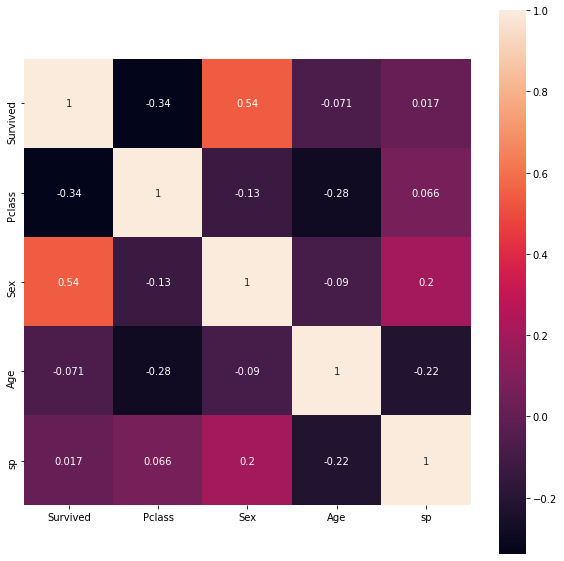

In [237]:
corr = trainData.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, square =True, annot = True)
plt.show()

# [ 사이킷런 ] 

# 문제 및 정답 분리

In [238]:
Y = trainData['Survived']
X = trainData.drop('Survived', axis=1)
X.head()

,Pclass,Sex,Age,sp
0,3,0,2,1
1,1,1,2,1
2,3,1,2,0
3,1,1,2,1
4,3,0,2,0


In [239]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# 데이터가 적으면 test_size = 0.2
# 데이터가 많으면 test_size = 0.3
# 문제와 정답을 7 : 3 으로 분리하여 할당.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=0)


# 모델 생성
DTmodel = DecisionTreeClassifier()
RFmodel = RandomForestClassifier()


# 학습 : fit()
DTmodel.fit(Xtrain, Ytrain)


# 예측 : predict()
preY = DTmodel.predict(Xtest)


# 점수 : score()
acs = accuracy_score(Ytest, preY)
print('accuracy_score : ', acs)


accuracy_score :  0.7798507462686567


# ========== 공모전용 ==========

In [249]:
# 모델 생성
DTmodel = DecisionTreeClassifier()
RFmodel = RandomForestClassifier()


# 학습 : fit()
DTmodel.fit(Xtrain, Ytrain)


# 예측 : predict()
preY = DTmodel.predict(testData)

# 제출
submit = pd.DataFrame({'PassengerId':pd.read_csv('test.csv')["PassengerId"]})
submit['Survived'] = preY
submit.to_csv('submission.csv', index=False)

In [250]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
